In [1]:
import numpy as np
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import shutil
from PIL import Image


# import the data

In [154]:
df=pd.read_excel('data/data.xlsx', index_col = 0)

In [130]:
#df = pd.read_csv('full_df.csv', index_col=0)
df.columns = df.columns.str.replace(' ','_').str.replace('-','_').str.lower()
df.shape

(3500, 14)

In [11]:
df.head(2)

,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,c,a,h,m,o
ID,,,,,,,,,,,,,,
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


# Normal Eye Sample

In [12]:
normal_full=df[df['n'] == 1]

## Left Eye

In [14]:
#pull out only normal eyes
normal_left=normal_full[normal_full['left_diagnostic_keywords'].str.contains('normal fundus')]

In [72]:
normal_left.shape

(1136, 14)

In [17]:
normal_left['left_fundus'].nunique()

1136

In [56]:
#checked to see how many unique key diagnostic labels
nl=normal_left.groupby(['left_diagnostic_keywords']).sum()
nl

,patient_age,n,d,g,c,a,h,m,o
left_diagnostic_keywords,,,,,,,,,
lens dust，normal fundus,4790,86,0,0,0,0,0,0,0
normal fundus,58045,1023,0,0,0,0,0,0,0
normal fundus，lens dust,1407,25,0,0,0,0,0,0,0
normal fundus，normal fundus,101,2,0,0,0,0,0,0,0


In [57]:
#checked to see how many unique key diagnostic labels
nr=normal_right.groupby(['right_diagnostic_keywords']).sum()
nr

,patient_age,n,d,g,c,a,h,m,o
right_diagnostic_keywords,,,,,,,,,
lens dust，normal fundus,4835,88,0,0,0,0,0,0,0
normal fundus,58579,1033,0,0,0,0,0,0,0
normal fundus，lens dust,1080,18,0,0,0,0,0,0,0


In [23]:
#to remove any other conditions, pure sample
normal_left2=normal_left[~normal_left['left_diagnostic_keywords'].str.contains('dust')]


In [24]:
#check to ensure only patients with normal eyes were included in list
al_check=normal_left2.groupby(['left_diagnostic_keywords']).sum()
al_check

,patient_age,n,d,g,c,a,h,m,o
left_diagnostic_keywords,,,,,,,,,
normal fundus,58045,1023,0,0,0,0,0,0,0
normal fundus，normal fundus,101,2,0,0,0,0,0,0,0


## Right Eye

In [25]:
#pull out only normal eyes
normal_right=normal_full[normal_full['right_diagnostic_keywords'].str.contains('normal fundus')]

In [27]:
#checked to see how many unique key diagnostic labels
nr=normal_right.groupby(['right_diagnostic_keywords']).sum()
nr

,patient_age,n,d,g,c,a,h,m,o
right_diagnostic_keywords,,,,,,,,,
lens dust，normal fundus,4835,88,0,0,0,0,0,0,0
normal fundus,58579,1033,0,0,0,0,0,0,0
normal fundus，lens dust,1080,18,0,0,0,0,0,0,0


In [28]:
#to remove any other conditions, pure sample
normal_right2=normal_right[~normal_right['right_diagnostic_keywords'].str.contains('dust')]

In [29]:
#check to ensure only patients with normal eyes were included in list
ar_check=normal_right2.groupby(['right_diagnostic_keywords']).sum()
ar_check

,patient_age,n,d,g,c,a,h,m,o
right_diagnostic_keywords,,,,,,,,,
normal fundus,58579,1033,0,0,0,0,0,0,0


In [30]:
#make a list of images for normal sample
normal_list_images=list(normal_left2['left_fundus'])+list(normal_right2['right_fundus'])
len(normal_list_images)

2058

# Diabetic Eyes

In [31]:
diabetic_full=df[df['d'] == 1]
diabetic_full.shape

(1128, 14)

In [77]:
#pull out only diabetic eyes
diabetic_left=diabetic_full[diabetic_full['left_diagnostic_keywords'].str.contains('retinopathy')]

In [78]:
diabetic_left.shape

(896, 14)

In [79]:
#pull out only diabetic eyes
diabetic_right=diabetic_full[diabetic_full['right_diagnostic_keywords'].str.contains('retinopathy')]

In [81]:
diabetic_right.shape

(924, 14)

In [83]:
#make a list of images for diabetic sample
diabetic_list_images=list(diabetic_left['left_fundus'])+list(diabetic_right['right_fundus'])
len(diabetic_list_images)

1820

# Diabetic Retinopathy Only-too small a smaple to use for now

## Left Eye Diabetic Only

In [59]:
#pull images with diabetic retinopathy only for left eye (only provides about 50 images, not enough, will use full list with multiple conditions)
diabetic_full_check=df[df['left_diagnostic_keywords'].str.contains('diabetic retinopathy')]
diabetic_full_check.shape

(49, 14)

In [65]:
#checked to see how many unique key diagnostic labels
dl=diabetic_left.groupby(['left_diagnostic_keywords']).sum()
dl

,patient_age,n,d,g,c,a,h,m,o
left_diagnostic_keywords,,,,,,,,,
diabetic retinopathy,602,0,10,2,0,4,0,0,2
diabetic retinopathy，dry age-related macular degeneration,52,0,1,0,0,1,0,0,0
diabetic retinopathy，post laser photocoagulation,125,0,2,0,0,0,0,0,2
diabetic retinopathy，wet age-related macular degeneration,59,0,1,0,0,1,0,0,0
diabetic retinopathy，wet age-related macular degeneration，macular epiretinal membrane,42,0,1,0,0,1,0,0,1
dry age-related macular degeneration，diabetic retinopathy,185,0,3,0,0,3,0,0,0
epiretinal membrane，laser spot，severe proliferative diabetic retinopathy,38,0,1,0,0,0,0,0,1
glaucoma，diabetic retinopathy,359,0,6,6,0,0,0,0,0
"hypertensive retinopathy,diabetic retinopathy",55,0,1,0,0,0,1,0,1


In [66]:
#to remove any other conditions, pure sample however this gives us a sample of 21, will not use
diabetic_left_true=diabetic_left[~diabetic_left_true['left_diagnostic_keywords'].str.contains('atrophy|glaucoma|laser|dust|hypertensive|age-related')]
diabetic_left_true.shape

(21, 14)

## Right Eye

In [67]:
#pull out only diabetic eyes (right side), not use as provides only 46 images
diabetic_right_true=diabetic_full[diabetic_full['right_diagnostic_keywords'].str.contains('diabetic retinopathy')]

In [68]:
diabetic_right_true['right_fundus'].nunique()

46

In [69]:
#checked to see how many unique key diagnostic labels
dr=diabetic_right_true.groupby(['right_diagnostic_keywords']).sum()
dr

,patient_age,n,d,g,c,a,h,m,o
right_diagnostic_keywords,,,,,,,,,
diabetic retinopathy,293,0,5,0,0,2,0,0,1
diabetic retinopathy，dry age-related macular degeneration,200,0,3,0,0,3,0,1,0
diabetic retinopathy，macular epiretinal membrane,42,0,1,0,0,1,0,0,1
diabetic retinopathy，post laser photocoagulation,63,0,1,0,0,0,0,0,1
dry age-related macular degeneration，diabetic retinopathy,209,0,3,0,0,3,0,0,0
glaucoma，diabetic retinopathy,337,0,6,6,0,0,0,0,0
hypertensive retinopathy，diabetic retinopathy,56,0,1,0,0,0,1,0,0
hypertensive retinopathy，suspected diabetic retinopathy,64,0,1,0,0,0,1,0,0
macular epiretinal membrane，diabetic retinopathy,80,0,1,0,0,0,0,0,1


In [70]:
#to remove any other conditions, pure sample
diabetic_right_true=diabetic_right_true[~diabetic_right_true['right_diagnostic_keywords'].str.contains('atrophy|glaucoma|laser|dust|hypertensive|age-related|membrane|optic|white')]

In [75]:
diabetic_right_true.shape

(15, 14)

In [76]:
#check to ensure only patients with diabetic eyes were included in list
dr_check=diabetic_right_true.groupby(['right_diagnostic_keywords']).sum()
dr_check

,patient_age,n,d,g,c,a,h,m,o
right_diagnostic_keywords,,,,,,,,,
diabetic retinopathy,293,0,5,0,0,2,0,0,1
proliferative diabetic retinopathy,515,0,9,0,0,0,0,0,0
severe proliferative diabetic retinopathy,70,0,1,0,0,0,0,0,0


# EDA

Normal (N),\
Diabetes (D),\
Glaucoma (G),\
Cataract (C),\
Age related Macular Degeneration (A),\
Hypertension (H),\
Pathological Myopia (M),\
Other diseases/abnormalities (O)

In [123]:
df.shape

(3500, 14)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 4784
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Age                3500 non-null   int64 
 1   Patient Sex                3500 non-null   object
 2   Left-Fundus                3500 non-null   object
 3   Right-Fundus               3500 non-null   object
 4   Left-Diagnostic Keywords   3500 non-null   object
 5   Right-Diagnostic Keywords  3500 non-null   object
 6   N                          3500 non-null   int64 
 7   D                          3500 non-null   int64 
 8   G                          3500 non-null   int64 
 9   C                          3500 non-null   int64 
 10  A                          3500 non-null   int64 
 11  H                          3500 non-null   int64 
 12  M                          3500 non-null   int64 
 13  O                          3500 non-null   int64 
dtypes: int64

In [125]:
df.isna().count()

Patient Age                  3500
Patient Sex                  3500
Left-Fundus                  3500
Right-Fundus                 3500
Left-Diagnostic Keywords     3500
Right-Diagnostic Keywords    3500
N                            3500
D                            3500
G                            3500
C                            3500
A                            3500
H                            3500
M                            3500
O                            3500
dtype: int64

**Structure of numerical features**\
\
This process will give us some insights about the number of binary (2 unique values), \
ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

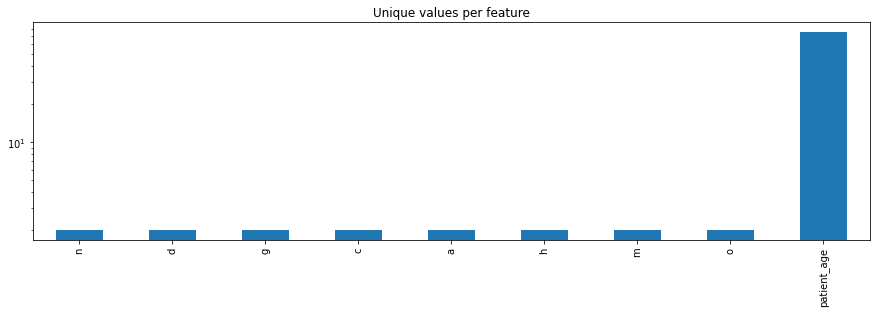

In [131]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [132]:
df.describe()

,patient_age,n,d,g,c,a,h,m,o
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,57.854000,0.325714,0.322286,0.061429,0.060571,0.046857,0.029429,0.049714,0.279714
std,11.724064,0.468708,0.467419,0.240149,0.238577,0.211363,0.169029,0.217385,0.448923
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
df.head()

,patient_age,patient_sex,left_fundus,right_fundus,left_diagnostic_keywords,right_diagnostic_keywords,n,d,g,c,a,h,m,o
ID,,,,,,,,,,,,,,
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


## Heatmap-to see if any missing values

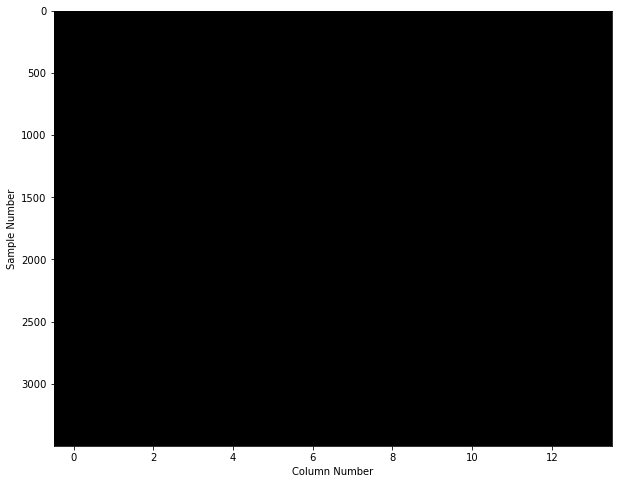

In [134]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

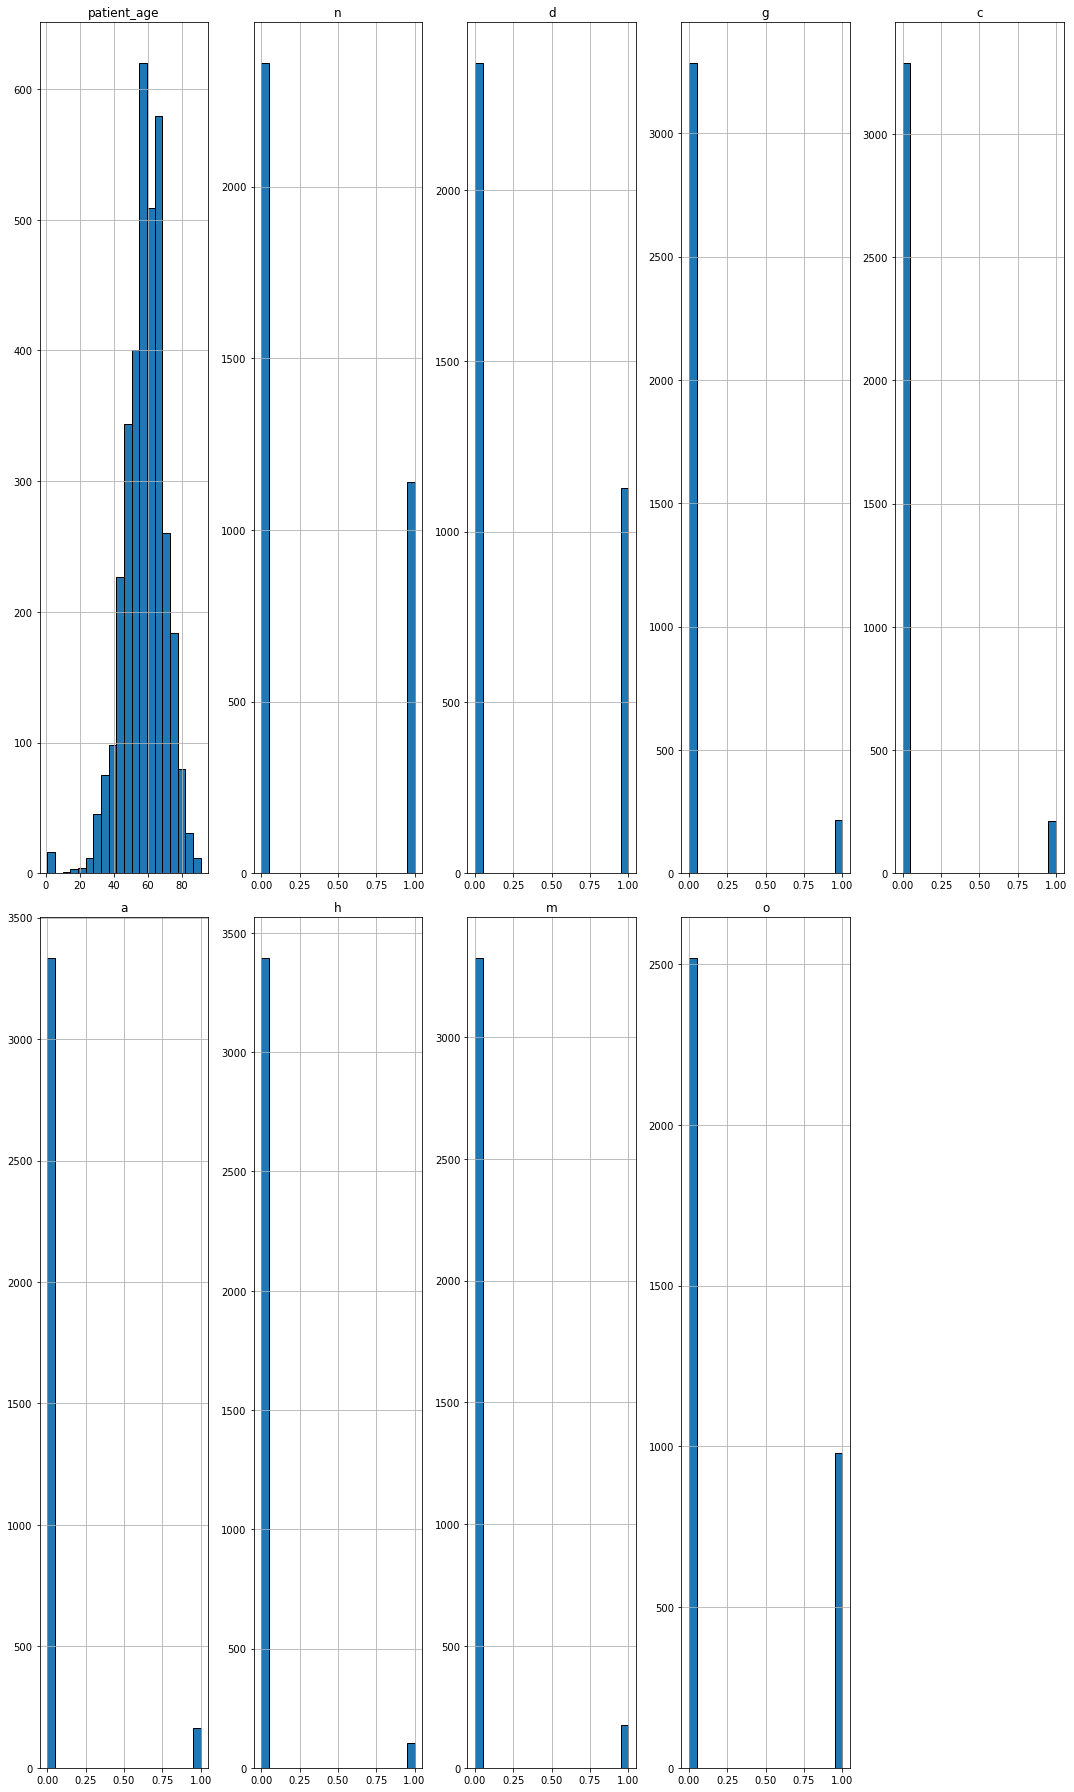

In [135]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=20, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [136]:
df.columns

Index(['patient_age', 'patient_sex', 'left_fundus', 'right_fundus',
       'left_diagnostic_keywords', 'right_diagnostic_keywords', 'n', 'd', 'g',
       'c', 'a', 'h', 'm', 'o'],
      dtype='object')

In [143]:
# Computes feature correlation
df_corr = df.corr(method="pearson")
df_corr

,patient_age,n,d,g,c,a,h,m,o
patient_age,1.000000,-0.073049,-0.080539,0.097791,0.186160,0.058005,-0.024944,-0.013635,0.067764
n,-0.073049,1.000000,-0.479285,-0.177807,-0.176481,-0.154101,-0.121023,-0.158968,-0.433113
d,-0.080539,-0.479285,1.000000,-0.094946,-0.075154,-0.106614,0.042701,-0.104288,-0.017049
g,0.097791,-0.177807,-0.094946,1.000000,-0.049996,0.005212,0.011778,-0.020193,-0.029528
c,0.186160,-0.176481,-0.075154,-0.049996,1.000000,-0.056300,-0.030041,-0.058079,-0.075515
a,0.058005,-0.154101,-0.106614,0.005212,-0.056300,1.000000,-0.006610,-0.032053,-0.089978
h,-0.024944,-0.121023,0.042701,0.011778,-0.030041,-0.006610,1.000000,-0.039828,-0.063315
m,-0.013635,-0.158968,-0.104288,-0.020193,-0.058079,-0.032053,-0.039828,1.000000,-0.013677
o,0.067764,-0.433113,-0.017049,-0.029528,-0.075515,-0.089978,-0.063315,-0.013677,1.000000


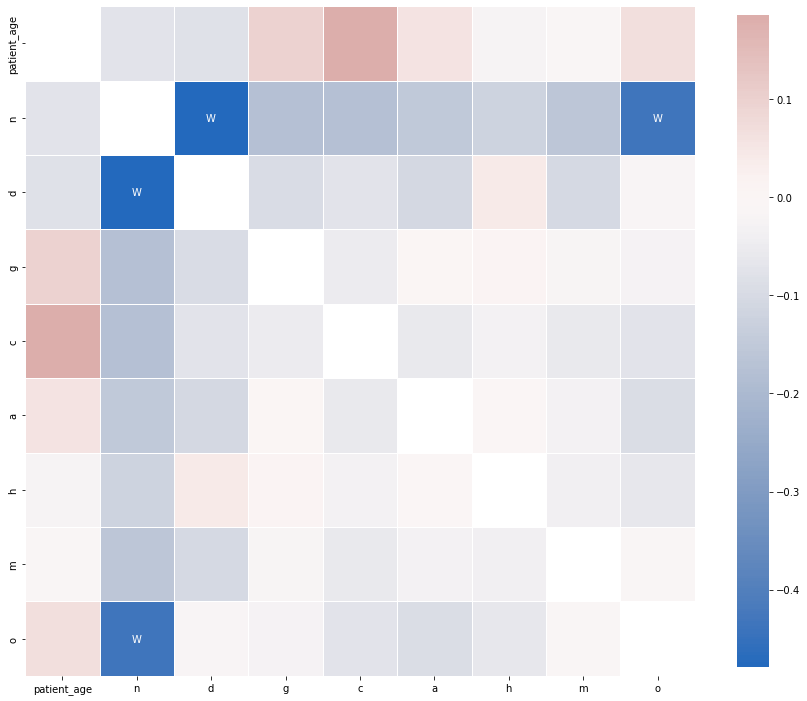

In [144]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

# Images

## Pull normal and diabetic images from pool of images

In [155]:
#move the normal images to normal folder and diabetic images to diabetic folder

src_dir = "/Users/karenbolon/Documents/spiced_projects/Diabetic_Retinopathy_Image_Classifier/Data/Training_Images/"
dst_dir = "/Users/karenbolon/Documents/spiced_projects/Diabetic_Retinopathy_Image_Classifier/Data/normal_training/"
dst_dir2 = "/Users/karenbolon/Documents/spiced_projects/Diabetic_Retinopathy_Image_Classifier/Data/diabetic_training/"

In [157]:
for jpgfile in os.listdir(src_dir):
        if jpgfile in normal_list_images:
            shutil.copy(os.path.join(src_dir, jpgfile), dst_dir)

In [158]:
for jpgfile in os.listdir(src_dir):
        if jpgfile in diabetic_list_images:
            shutil.copy(os.path.join(src_dir, jpgfile), dst_dir2)

In [159]:
src_dir1 = "/Users/karenbolon/Documents/spiced_projects/Diabetic_Retinopathy_Image_Classifier/Data/Testing_Images/"
dst_dir3 = "/Users/karenbolon/Documents/spiced_projects/Diabetic_Retinopathy_Image_Classifier/Data/normal_testing/"
dst_dir4 = "/Users/karenbolon/Documents/spiced_projects/Diabetic_Retinopathy_Image_Classifier/Data/diabetic_testing/"


In [162]:
#to move normal testing images:
for jpgfile in os.listdir(src_dir1):
        if jpgfile in normal_list_images:
            shutil.copy(os.path.join(src_dir1, jpgfile), dst_dir3)

In [163]:
for jpgfile in os.listdir(src_dir1):
        if jpgfile in diabetic_list_images:
            shutil.copy(os.path.join(src_dir1, jpgfile), dst_dir4)